This file validates whether the pipeline yields the same result as previous run, and whether is similar to the ground truth provided by UK Biobank.

In [8]:
import pandas as pd
import sys
import os
sys.path.append('..')
import config

from utils.analyze_utils import calculate_icc, bland_altman_plot

In [9]:
previous_result_complete = os.path.join(os.path.dirname(os.path.dirname(config.features_dir)), 
                                        "Previous_Result", "table_atrial_volume_qc.csv")
previous_result_complete = pd.read_csv(previous_result_complete, index_col=0)
current_result_visit1_complete = os.path.join(config.features_visit1_dir, "comprehensive", "atrial_volume.csv")
current_result_visit1_complete = pd.read_csv(current_result_visit1_complete)
current_result_visit2_complete = os.path.join(config.features_visit2_dir, "comprehensive", "atrial_volume.csv")
current_result_visit2_complete = pd.read_csv(current_result_visit2_complete)
# https://biobank.ndph.ox.ac.uk/ukb/dset.cgi?id=2541
ground_truth_complete = "/work/users/y/u/yuukias/Heart_Pipeline/doc/UKB_Ground_Truth/Return2541.csv"
ground_truth_complete = pd.read_csv(ground_truth_complete)

In [10]:
print(previous_result_complete.shape)
print(current_result_visit1_complete.shape)
print(current_result_visit2_complete.shape)
print(ground_truth_complete.shape)

(41606, 9)
(59112, 9)
(3760, 9)
(804, 22)


In [11]:
previous_result_complete.head()

,ID,LAV.max..mL.,LAV.min..mL.,LASV..mL.,LAEF....,RAV.max..mL.,RAV.min..mL.,RASV..mL.,RAEF....
1,5800125,36.074494,7.502136,28.572358,79.203766,106.113517,43.876737,62.236781,58.651134
2,5800154,72.814210,25.913484,46.900726,64.411502,60.152012,25.801225,34.350786,57.106629
3,5800176,55.156724,27.017051,28.139673,51.017666,84.068392,55.445839,28.622553,34.046747
4,5800409,57.671008,9.899968,47.771040,82.833718,50.850005,26.682186,24.167819,47.527664
5,5800640,47.088660,15.481427,31.607233,67.122812,65.558649,32.997734,32.560915,49.666849


In [12]:
previous_result = previous_result_complete[["ID", "LAV.max..mL.", "LAV.min..mL.", "LASV..mL.", "LAEF...."]]
previous_result = previous_result.sort_values(by="ID")
previous_result.head(5)

,ID,LAV.max..mL.,LAV.min..mL.,LASV..mL.,LAEF....
22444,1000098,73.049792,36.157293,36.892499,50.503223
22445,1000167,70.888212,30.014496,40.873715,57.659397
22446,1000240,97.694579,46.160519,51.534059,52.750173
22447,1000560,129.860066,62.460204,67.399862,51.901916
22448,1000575,73.628653,30.514164,43.114489,58.556673


In [13]:
current_result_visit1 = current_result_visit1_complete[["eid", "LA_max(bip) [mL]", "LA_min(bip) [mL]",
                                                        "LA_SV(bip) [mL]", "LA_EF(bip) [%]"]]
current_result_visit2 = current_result_visit2_complete[["eid", "LA_max(bip) [mL]", "LA_min(bip) [mL]",
                                                        "LA_SV(bip) [mL]", "LA_EF(bip) [%]"]]
current_result_visit1.head(5)

,eid,LA_max(bip) [mL],LA_min(bip) [mL],LA_SV(bip) [mL],LA_EF(bip) [%]
0,1075336,39.270025,7.633113,31.636912,80.562496
1,1075369,54.655947,20.167335,34.488612,63.101298
2,1075434,66.354981,15.538023,50.816958,76.583486
3,1075489,62.919367,21.920472,40.998895,65.161009
4,1075528,63.942055,26.387154,37.554901,58.732709


In [14]:
calculate_icc(current_result_visit1, current_result_visit2, "eid", "eid", 
                {
                    "LA_max(bip) [mL]": "LA_max(bip) [mL]",
                    "LA_min(bip) [mL]": "LA_min(bip) [mL]",
                    "LA_SV(bip) [mL]": "LA_SV(bip) [mL]",
                    "LA_EF(bip) [%]": "LA_EF(bip) [%]"
                })

There are 2773 common subjects in the two datasets.
Feature: LA_max(bip) [mL] in data_1 and LA_max(bip) [mL] in data_2
    Type              Description       ICC         F   df1   df2  pval         CI95%
3  ICC1k  Average raters absolute  0.873869  7.928285  2772  2773   0.0  [0.86, 0.88]
5  ICC3k     Average fixed raters  0.873850  7.927072  2772  2772   0.0  [0.86, 0.88]
Feature: LA_min(bip) [mL] in data_1 and LA_min(bip) [mL] in data_2
    Type              Description       ICC         F   df1   df2  pval         CI95%
3  ICC1k  Average raters absolute  0.857283  7.006862  2772  2773   0.0  [0.85, 0.87]
5  ICC3k     Average fixed raters  0.857971  7.040827  2772  2772   0.0  [0.85, 0.87]
Feature: LA_SV(bip) [mL] in data_1 and LA_SV(bip) [mL] in data_2
    Type              Description       ICC         F   df1   df2  pval         CI95%
3  ICC1k  Average raters absolute  0.842807  6.361600  2772  2773   0.0  [0.83, 0.85]
5  ICC3k     Average fixed raters  0.844657  6.437382  2772  

In [15]:
calculate_icc(current_result_visit1, previous_result_complete, "eid", "ID", 
                {
                    "LA_max(bip) [mL]": "LAV.max..mL.",
                    "LA_min(bip) [mL]": "LAV.min..mL.",
                    "LA_SV(bip) [mL]": "LASV..mL.",
                    "LA_EF(bip) [%]": "LAEF...."
                })

There are 41000 common subjects in the two datasets.
Feature: LA_max(bip) [mL] in data_1 and LAV.max..mL. in data_2
    Type              Description       ICC             F    df1    df2  pval       CI95%
3  ICC1k  Average raters absolute  0.999985  66815.094985  40999  41000   0.0  [1.0, 1.0]
5  ICC3k     Average fixed raters  0.999985  66813.543907  40999  40999   0.0  [1.0, 1.0]
Feature: LA_min(bip) [mL] in data_1 and LAV.min..mL. in data_2
    Type              Description       ICC             F    df1    df2  pval       CI95%
3  ICC1k  Average raters absolute  0.999985  64794.227827  40999  41000   0.0  [1.0, 1.0]
5  ICC3k     Average fixed raters  0.999985  64792.905992  40999  40999   0.0  [1.0, 1.0]
Feature: LA_SV(bip) [mL] in data_1 and LASV..mL. in data_2
    Type              Description       ICC             F    df1    df2  pval       CI95%
3  ICC1k  Average raters absolute  0.999947  19009.775985  40999  41000   0.0  [1.0, 1.0]
5  ICC3k     Average fixed raters  0.99994

In [16]:
current_result_visit1.head()

,eid,LA_max(bip) [mL],LA_min(bip) [mL],LA_SV(bip) [mL],LA_EF(bip) [%]
0,1075336,39.270025,7.633113,31.636912,80.562496
1,1075369,54.655947,20.167335,34.488612,63.101298
2,1075434,66.354981,15.538023,50.816958,76.583486
3,1075489,62.919367,21.920472,40.998895,65.161009
4,1075528,63.942055,26.387154,37.554901,58.732709


There are 41000 common subjects in the two datasets.
Feature: LA_max(bip) [mL] in data_1 and LAV.max..mL. in data_2


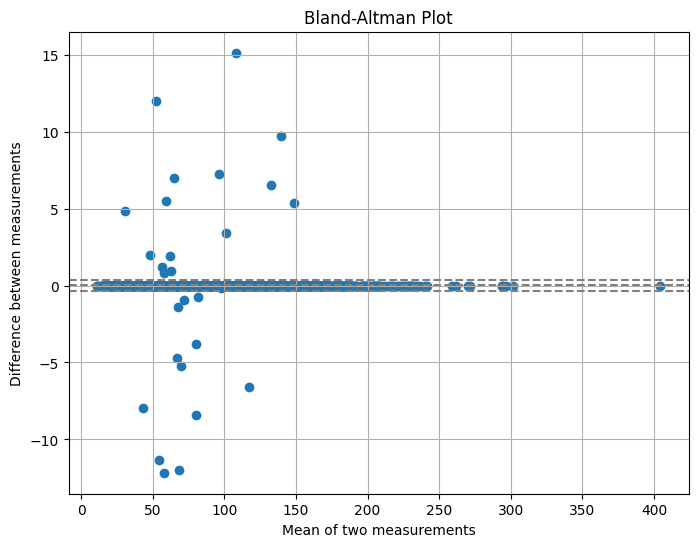

Feature: LA_min(bip) [mL] in data_1 and LAV.min..mL. in data_2


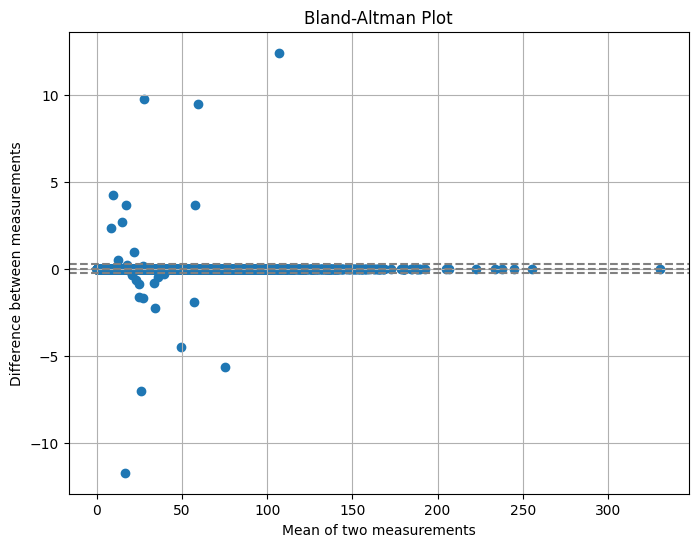

Feature: LA_SV(bip) [mL] in data_1 and LASV..mL. in data_2


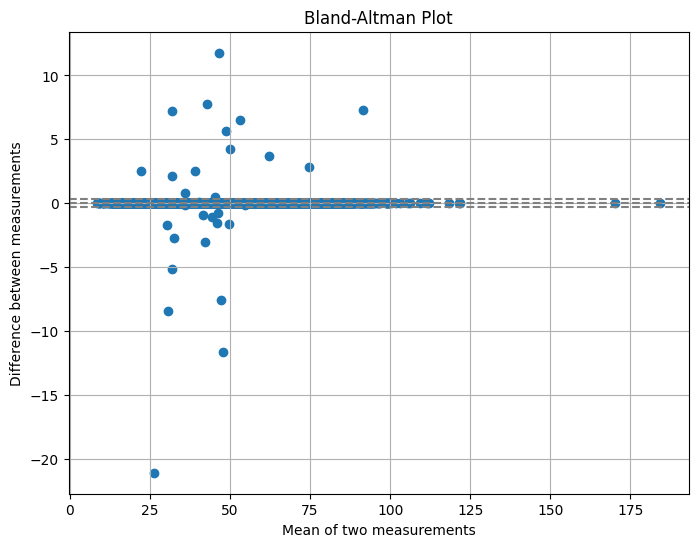

Feature: LA_EF(bip) [%] in data_1 and LAEF.... in data_2


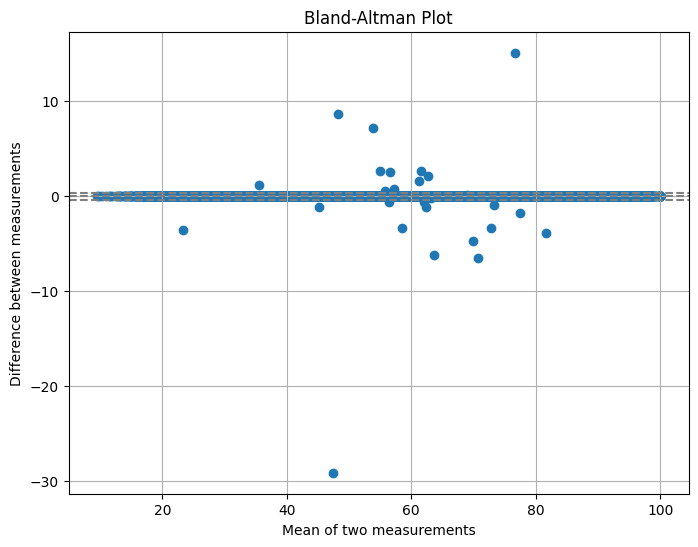

In [17]:
bland_altman_plot(current_result_visit1, previous_result_complete, "eid", "ID",
                    {
                        "LA_max(bip) [mL]": "LAV.max..mL.",
                        "LA_min(bip) [mL]": "LAV.min..mL.",
                        "LA_SV(bip) [mL]": "LASV..mL.",
                        "LA_EF(bip) [%]": "LAEF...."
                    })

In [21]:
ground_truth_complete.head()
ground_truth = ground_truth_complete[["eid", 
                                      "cmr:Analysis:LA_2Ch_vol_max", "cmr:Analysis:LA_2Ch_vol_min", 
                                      "cmr:Analysis:LA_4Ch_vol_max", "cmr:Analysis:LA_4Ch_vol_min",
                                      "cmr:Analysis:LA_Biplan_vol_max", "cmr:Analysis:LA_Biplan_vol_min",
                                      "cmr:Analysis:LA_Biplan.SV", "cmr:Analysis:LA_Biplan.EF"]]
ground_truth = ground_truth.dropna()
ground_truth.head()

,eid,cmr:Analysis:LA_2Ch_vol_max,cmr:Analysis:LA_2Ch_vol_min,cmr:Analysis:LA_4Ch_vol_max,cmr:Analysis:LA_4Ch_vol_min,cmr:Analysis:LA_Biplan_vol_max,cmr:Analysis:LA_Biplan_vol_min,cmr:Analysis:LA_Biplan.SV,cmr:Analysis:LA_Biplan.EF
0,1000694,31.460,10.920,45.790,14.780,37.40,12.360,25.040,66.951872
1,1018860,73.500,27.830,72.320,23.980,72.83,25.760,47.070,64.629960
2,1025499,33.000,12.000,56.000,16.000,43.00,13.000,30.000,69.767442
3,1034285,38.623,15.154,46.878,18.244,42.46,16.543,25.917,61.038625
4,1049517,41.000,18.000,68.000,25.000,52.00,21.000,31.000,59.615385


In [23]:
calculate_icc(current_result_visit1, ground_truth, "eid", "eid",{
                    "LA_max(bip) [mL]": "cmr:Analysis:LA_Biplan_vol_max",
                    "LA_min(bip) [mL]": "cmr:Analysis:LA_Biplan_vol_min",
                    "LA_SV(bip) [mL]": "cmr:Analysis:LA_Biplan.SV",
                    "LA_EF(bip) [%]": "cmr:Analysis:LA_Biplan.EF"
            })

There are 731 common subjects in the two datasets.
Feature: LA_max(bip) [mL] in data_1 and cmr:Analysis:LA_Biplan_vol_max in data_2
    Type              Description       ICC          F  df1  df2           pval         CI95%
3  ICC1k  Average raters absolute  0.964181  27.917924  730  731  4.644217e-322  [0.96, 0.97]
5  ICC3k     Average fixed raters  0.985768  70.265609  730  730   0.000000e+00  [0.98, 0.99]
Feature: LA_min(bip) [mL] in data_1 and cmr:Analysis:LA_Biplan_vol_min in data_2
    Type              Description       ICC          F  df1  df2  pval         CI95%
3  ICC1k  Average raters absolute  0.974800  39.682421  730  731   0.0  [0.97, 0.98]
5  ICC3k     Average fixed raters  0.978306  46.095403  730  730   0.0  [0.97, 0.98]
Feature: LA_SV(bip) [mL] in data_1 and cmr:Analysis:LA_Biplan.SV in data_2
    Type              Description       ICC          F  df1  df2           pval         CI95%
3  ICC1k  Average raters absolute  0.914847  11.743582  730  731  2.454111e-199  